# <font color='purple'> Ham or Spam

### Cep telefonlarına gelen mesajların normal mi yoksa reklam mesajı mı olduğunu anlayan model

In [1]:
# Makine öğrenmesi : Regression-Classification-Clustering

In [2]:
#pip install wordcloud

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem.porter import PorterStemmer

import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import SVC
s=SVC()

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
df=pd.read_csv('spam.csv',encoding='latin-1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
#inplace=True tablonun içinde değişiklik yapıyor. Yoksa eski dosya aynı duruyor. İlave yeni dosya oluşturuyor.

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.columns=['Class','Text']

In [9]:
df.head()

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df['Label']=df['Class'].map({'ham':0,'spam':1})

In [11]:
df.head()

,Class,Text,Label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


<Axes: xlabel='Class', ylabel='count'>

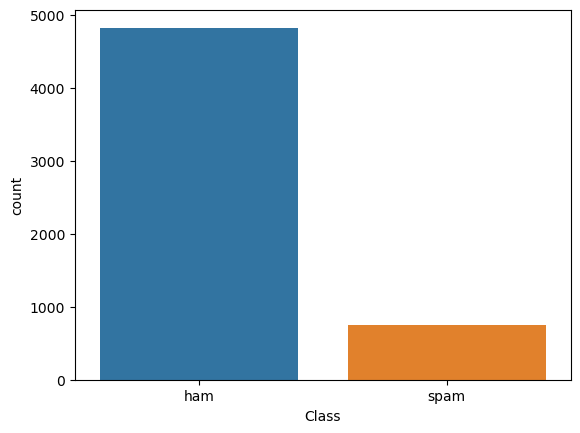

In [12]:
sns.countplot(x=df['Class'])

In [13]:
df.shape

(5572, 3)

In [14]:
df['Text']=df['Text'].str.lower()
df['Text']=df['Text'].str.replace('[^\w\s]','') #Noktalama işaretlerini kaldır.
df['Text']=df['Text'].str.replace('\d+','') #Rakamları kaldır.
df['Text']=df['Text'].str.replace('\r','').replace('\n','') #satır sonlarını düzenliyor.

In [15]:
spam=df[df['Class']=='spam']['Text'] 
ham=df[df['Class']=='ham']['Text']

In [16]:
from wordcloud import WordCloud

In [17]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    wc=WordCloud(background_color=bgcolor) #stopwords='english' yazınca stopwords kalmıyor. ama kaldı!
    wc.generate(''.join(data))
    plt.imshow(wc)
    plt.axis('off')

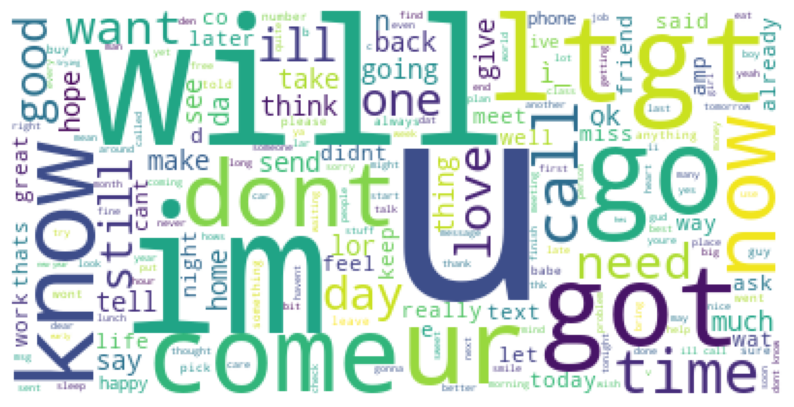

In [18]:
wc(ham,'white')

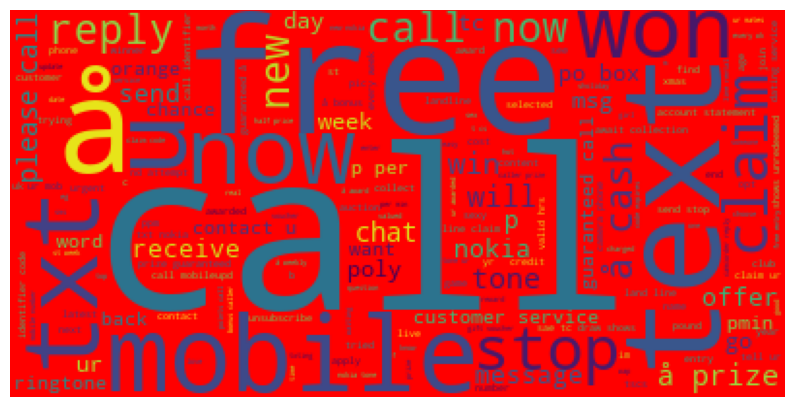

In [19]:
wc(spam,'red')

In [20]:
x=df['Text']
y=df['Label']

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
vect=CountVectorizer(stop_words='english')

In [23]:
x=vect.fit_transform(x) #vektöre çevirdik.

In [24]:
x

<5572x8324 sparse matrix of type '<class 'numpy.int64'>'
	with 41188 stored elements in Compressed Sparse Row format>

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.2, random_state=42)

In [26]:
model=s.fit(x_train,y_train)

In [27]:
tahmin=model.predict(x_test)

In [28]:
accuracy_score(tahmin,y_test)

0.9695067264573991

In [29]:
#pip install joblib

In [33]:
import joblib

In [32]:
''.join(ham)

'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore watok lar joking wif u oniu dun say so early hor u c already then saynah i dont think he goes to usf he lives around here thougheven my brother is not like to speak with me they treat me like aids patentas per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press  to copy your friends callertuneim gonna be home soon and i dont want to talk about this stuff anymore tonight k ive cried enough todayive been searching for the right words to thank you for this breather i promise i wont take your help for granted and will fulfil my promise you have been wonderful and a blessing at all timesi have a date on sunday with willoh kim watching hereeh u remember how  spell his name yes i did he v naughty make until i v wetfine if thatåõs the way u feel thatåõs the way its gota bis that seriously how you spell his nameiûm going to try for  mo

In [34]:
tmodel=joblib.load('spammesaj.loblib')

In [31]:
joblib.dump(model,'spammesaj.loblib')

['spammesaj.loblib']

In [35]:
tmodel.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
#son 3 madde şirket load ederken yapacağı adımlar.